In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model




Load Data

In [ ]:
split_dir = '/content/drive/MyDrive/ai dataset split'
# Create directories for the train, validation and test sets
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')
test_dir = os.path.join(split_dir, 'test')
labels = ['pneumonia', 'normal','covid']
def load_and_preprocess_data(data_dir):
    data = []
    img_size = 224
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, (img_size, img_size))
                data.append([img_resized, class_num])
    return np.array(data, dtype=object)

# Extract the training, validation, and testing data
train_data = load_and_preprocess_data(train_dir)
val_data = load_and_preprocess_data(val_dir)
test_data = load_and_preprocess_data(test_dir)
# Separate the images and the labels
x_train, y_train = zip(*train_data)
x_val, y_val = zip(*val_data)
x_test, y_test = zip(*test_data)

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

Train The Model

In [ ]:
# Check TensorFlow version
print("TensorFlow version: ", tf.__version__)

# Check if TensorFlow is using GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[learning_rate_reduction])
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

TensorFlow version:  2.15.0
Found GPU at: /device:GPU:0
Epoch 1/40
131/131 [==============================] - 24s 111ms/step - loss: 1.3243 - accuracy: 0.8182 - val_loss: 6.6476 - val_accuracy: 0.4816 - lr: 0.0010
Epoch 2/40
131/131 [==============================] - 13s 96ms/step - loss: 0.3164 - accuracy: 0.9021 - val_loss: 0.4392 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 3/40
131/131 [==============================] - 13s 96ms/step - loss: 0.2265 - accuracy: 0.9284 - val_loss: 0.6024 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 4/40
131/131 [==============================] - 13s 96ms/step - loss: 0.1756 - accuracy: 0.9425 - val_loss: 0.2783 - val_accuracy: 0.9078 - lr: 0.0010
Epoch 5/40
131/131 [==============================] - 13s 97ms/step - loss: 0.1709 - accuracy: 0.9444 - val_loss: 0.2649 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 6/40
131/131 [==============================] - 13s 98ms/step - loss: 0.1879 - accuracy: 0.9397 - val_loss: 0.3088 - val_accuracy: 0.9014 - lr: 0.0010
E

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.savefig('mymodel1.png')

44/44 [==============================] - 1s 27ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

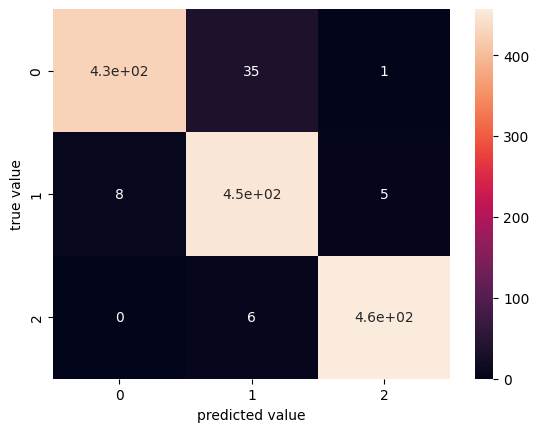

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm,annot=True,square=False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show
plt.savefig('cm1.png')


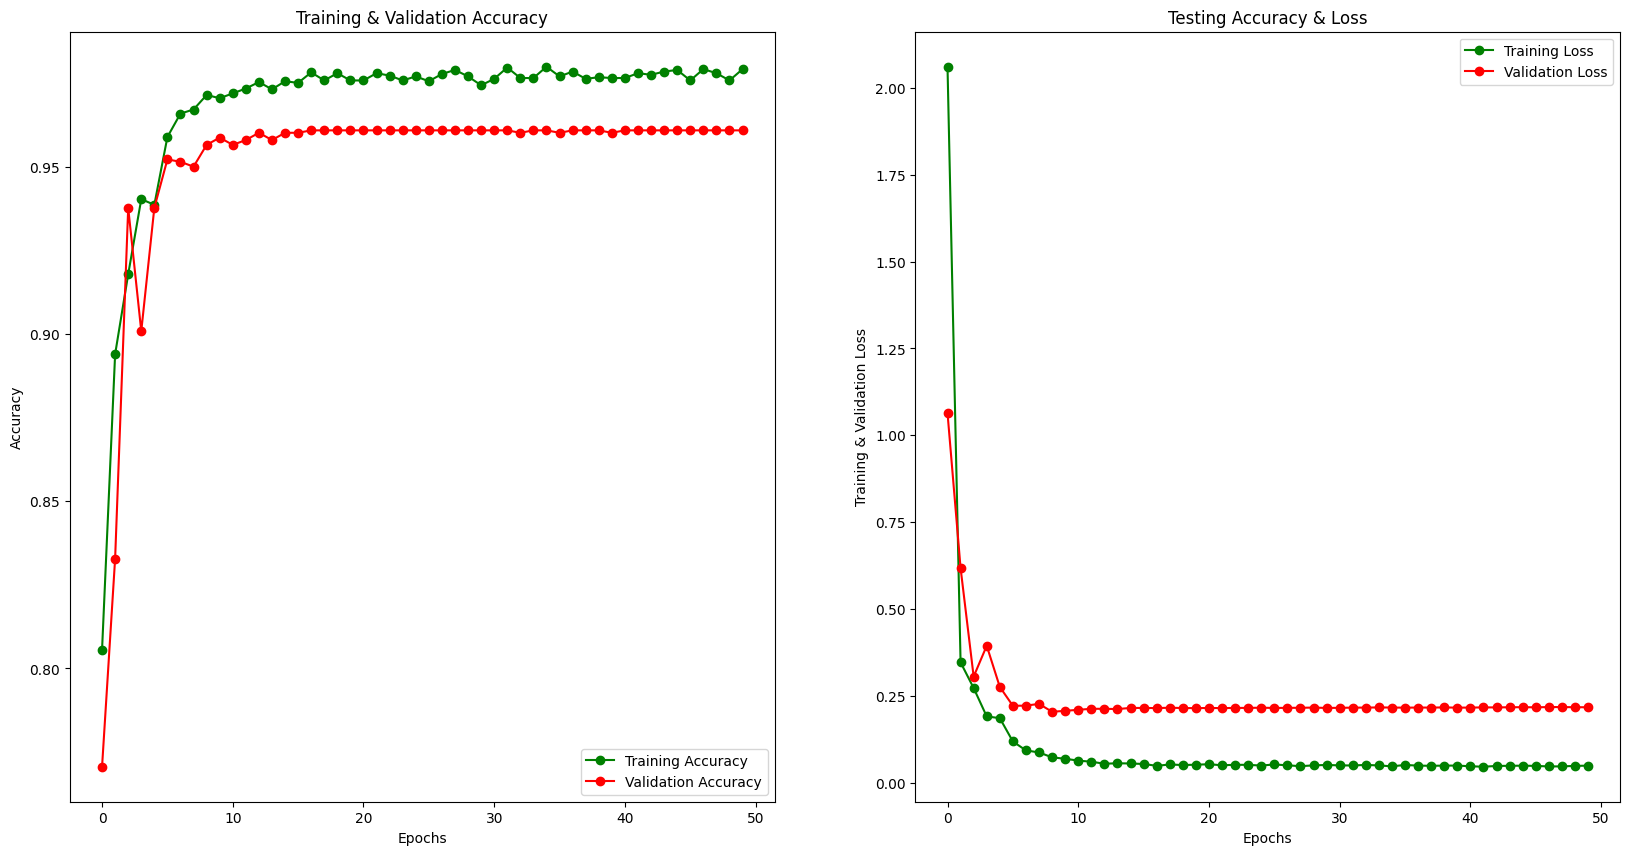

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()
plt.savefig('eval1.png')

In [ ]:
from google.colab import files

# Assuming you've saved a plot as 'myplot.png'
files.download('cm1.png')
files.download('mymodel1.png')
files.download('eval1.png')
